In [1]:
from sLSP4SNFs import *
import pandas as pd
import numpy as ny
from lightkurve import LightCurve
import lightkurve as lk


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/opt/anaconda3/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/wangxuan/.lightkurve/cache. Please move all the files in the legacy directory /Users/wangxuan/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


# Load the data of the light variation curve

In [2]:
df = pd.read_csv('./KIC9533489.out',skiprows=3,sep='\s+',header=None)
time, flux = df[0].to_numpy(), df[1].to_numpy()

# Use slsp to identify SNF

## 1. Perform sLSP calculation

In [3]:
# Initialize the sLSP object
slsp_ob = SLSP(time,flux)

# Perform sLSP calculation. 
# This is necessary before identifying the specific frequency.
slsp_ob.compute_slsp()

/opt/anaconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:279: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


## 2. Identify specific frequencies

In [4]:
# Determine whether the frequency 189.33 uHz is an SNF
slsp_ob.analyze_snf(189.33)  # The unit of frequency is uHz.


       sLSP4SNFs ANALYSIS REPORT
SUCCESS: The target at 189.33 uHz is identified as a 
Super-Nyquist Frequency (SNF). 




/opt/anaconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:279: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


In [5]:
# If you want to identify other frequencies, there is no need to recalculate the sLSP. 
slsp_ob.analyze_snf(200.07)


       sLSP4SNFs ANALYSIS REPORT
SUCCESS: The target at 200.07 uHz is identified as a 
Super-Nyquist Frequency (SNF). 




/opt/anaconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:279: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


In [6]:
# Real frequency
slsp_ob.analyze_snf(46.378)


       sLSP4SNFs ANALYSIS REPORT
REJECTED: The target at 46.38 uHz is NOT an SNF. 




/opt/anaconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:279: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


In [7]:
# You can check the identification status by accessing the attribute "snfState".
slsp_ob.snfState

'Rejected'

## Plotting

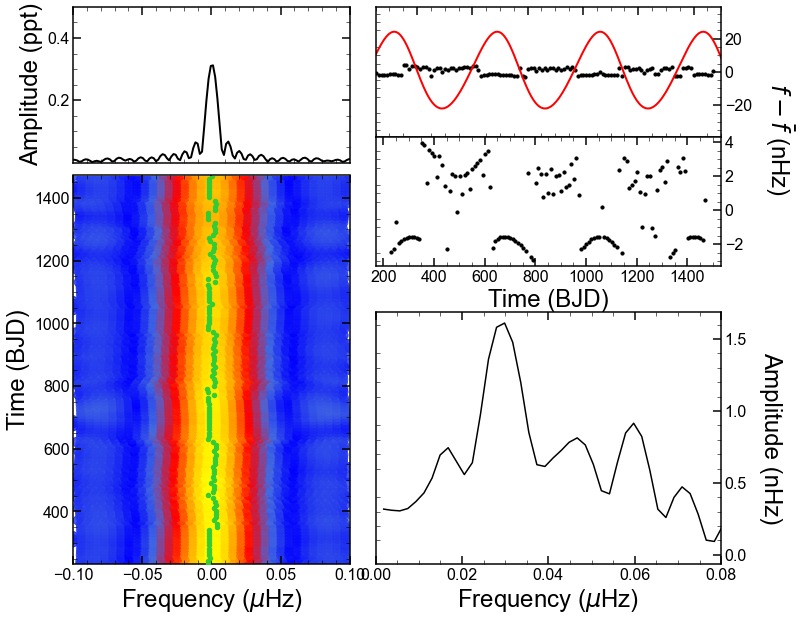

In [8]:
# Note: Ensure identification is finalized before plotting.

# Create a graphics editor
ploter = slsp_ob.plot()

# Diagram of the identification of SNF
ploter.SNF()

/opt/anaconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:279: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(



       sLSP4SNFs ANALYSIS REPORT
SUCCESS: The target at 200.07 uHz is identified as a 
Super-Nyquist Frequency (SNF). 




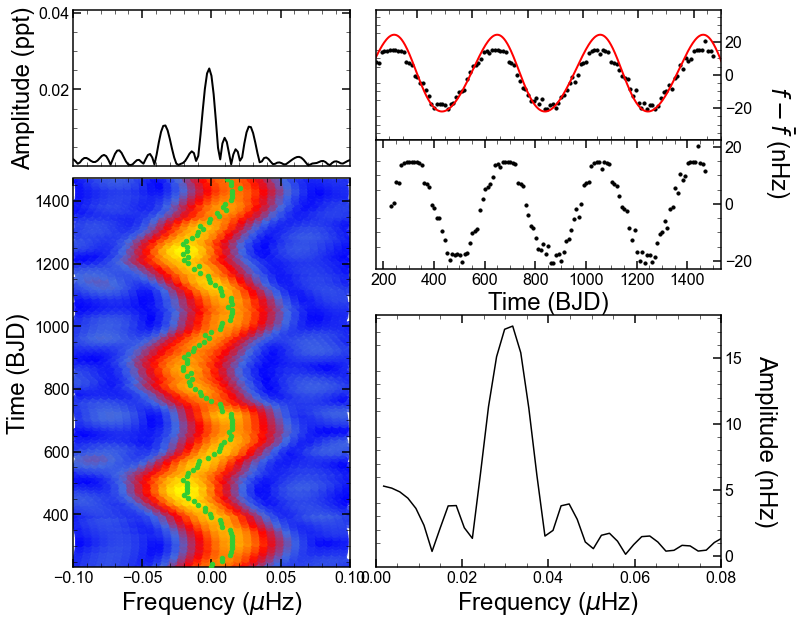

In [9]:
# Draw identification charts for other frequencies
slsp_ob.analyze_snf(200.07)
ploter.SNF()

<Axes: xlabel='Frequency ($\\mu$Hz)', ylabel='Amplitude (ppt)'>

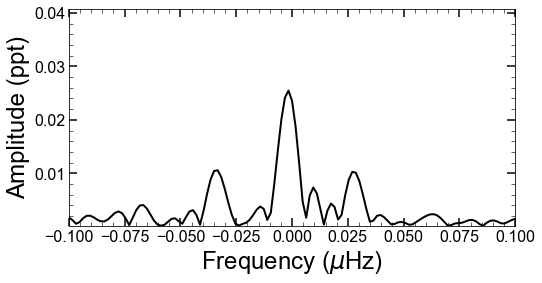

In [10]:
# Some supplementary drawings
ploter.LSP()

<Axes: xlabel='Frequency ($\\mu$Hz)', ylabel='Time (BJD)'>

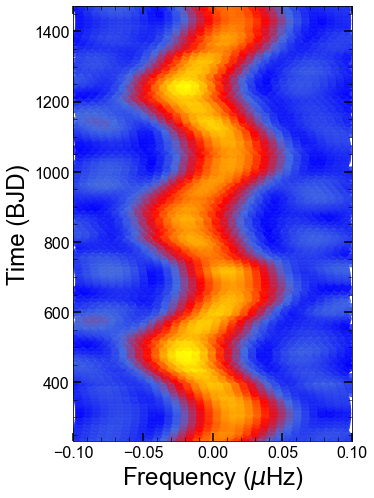

In [11]:
# Some supplementary drawings
ploter.sLSP()